# STEP 1: Set up your analysis

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Add imports for packages that help you:</p>
<ol type="1">
<li>Work with the file system interoperably</li>
<li>Work with vector data</li>
<li>Create interactive plots of vector data</li>
</ol></div></div>

In [2]:
import os
import pathlib

# work with vector data
import geopandas as gpd 

# interactive plots of vector data
# add a tile map as a basemap to a plot with the tiles parameter
import hvplot.pandas

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare data directory</div></div><div class="callout-body-container callout-body"><p>In the cell below, <strong>reproducibly and interoperably</strong>
define and create a project data directory somewhere in your home
folder. Be careful not to save data files to your <code>git</code>
repository!</p></div></div>

In [3]:
# Define and create the project data directory

data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'redlining',
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

/tmp/ipykernel_2565/1542854444.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  redlining_gdf.to_file(redlining_map_path)
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'city_survey' to 'city_surve'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'residential' to 'residentia'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: /home/jovyan/earth-analytics/data/redlining/us_census_survey/redlining.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


<Axes: >

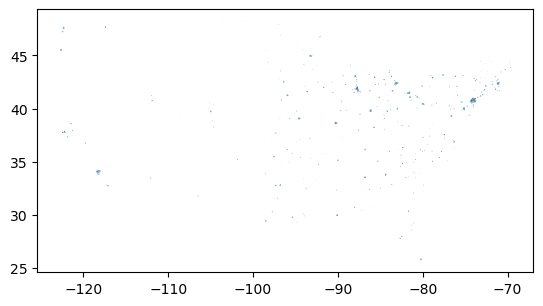

In [4]:
# Define url for redlining download
us_census_redlining_url = (
    "https://dsl.richmond.edu/panorama/redlining/static"
    "/mappinginequality.gpkg"
)

# Set up a path to save the data locally
us_census_survey_dir = os.path.join(data_dir, 'us_census_survey')

# Make the U.S. Census Survey directory
os.makedirs(us_census_survey_dir, exist_ok=True)

# Join redlining geopackage path
redlining_map_path = os.path.join(us_census_survey_dir, 'redlining.shp')

# Only download once and create GeoDataFrame
if not os.path.exists(redlining_map_path):
    redlining_gdf = gpd.read_file(us_census_redlining_url)
    redlining_gdf.to_file(redlining_map_path)

# Load from file
redlining_gdf = (
    gpd.read_file(redlining_map_path)
)

# Check the data
redlining_gdf.plot()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create an interactive site map</div></div><div class="callout-body-container callout-body"><p>In the cell below:</p>
<ol type="1">
<li>Select only the data where the <code>city</code> column is equal to
<code>"Denver"</code>.</li>
<li>For now, dissolve the regions with the <code>.dissolve()</code>
method so we see only a map of Denver.</li>
<li>Plot the data with the <code>EsriImagery</code> tile source basemap.
Make sure we can see your basemap underneath!</li>
</ol></div></div>

In [5]:
denver_redlining_gdf = redlining_gdf.loc[redlining_gdf['city'] == 'Denver']

# dissolve all the geometries within a given group (Denver) into a single geometric feature
# plot with EsriImagery basemap  
denver_redlining_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='City of Denver',
    fill_color=None, line_color='darkorange', line_width=3,
    frame_width=600
)

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

#### Site Description

In Denver, the legacy of redlining has siloed communities of color in urban areas that are more likely to lack green space and be located closer to environmental hazards. Consequently, non-Hispanic white communities are less likely to experience the burdens of health and environmental inequity (Thomas, 2022). The observed environmental injustices imposed in redlined spaces are extensive with impacts ranging across communities: 

- Today, approximately 43% of Black Americans live in urban “heat islands” which contain minimal tree cover and large amounts of exposed asphalt and concrete which retain heat and increase ambient temperature. These neighborhoods are up to 12.6°F warmer than non-redlined neighborhoods. Extreme heat events are also exacerbated in redlined areas, with Black Americans incurring higher rates of heat-related deaths and illnesses than white communities.
- Unlike white Americans, Latinx communities are 21% more likely to live in a heat island. Additionally, over 4.3 million Latinx families live in homes without access to air-conditioning. Air pollution is another great concern: about 50% of Latinx individuals live in areas which violate clean air and ozone standards.
- Urban heat islands magnify impacts of diminished indoor air quality as well which has been attributed to asthma rates in tribal communities that are nearly double the U.S. average. Furthermore, the inequitable distribution of urban green space coincides with other forms of systemic racism and their impacts, such as government displacement of tribal communities and sparse access to safe running water.
- On average, 50% of Asian American communities have reduced access to shaded green spaces and 32% of Asian Americans live in neighborhoods where heat-retaining surfaces cover more than half of the ground. Moreover, Southeast and South Asian communities have the 4th and 5th greatest risk of cancer due to air pollution. Compared to other racial groups, Chinese and Korean Americans have the highest mean cancer risk from air pollution exposure.

Reference

Thomas, L. (2022). *The intersectional environmentalist: How to dismantle systems of oppression to protect people + planet*. Little, Brown and Company.

**Data Citation**

Madron, J., Champine, R., Ayers, N., Dzuliashvili, Z., Encino, R., Holland, J., … Kliebert, P. (2023). *City Survey Files, 1935-1940* [Dataset]. University of Richmond. https://dsl.richmond.edu/panorama/redlining/static/mappinginequality.gpkg

In [6]:
# store variables
%store denver_redlining_gdf data_dir

Stored 'denver_redlining_gdf' (GeoDataFrame)
Stored 'data_dir' (str)
